# **Kaggle Environment Setup:**

In [1]:
!pip install "scikit-learn<1.4" umap-learn

INFO: pip is looking at multiple versions of umap-learn to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 3.8 MB/s eta 0:00:00
  Attempting uninstall: umap-learn
    Found existing installation: umap-learn 0.5.9.post2
    Uninstalling umap-learn-0.5.9.post2:
      Successfully uninstalled umap-learn-0.5.9.post2


In [2]:
# No need to install extra libraries in here, Kaggle already have them pre-installed
# test code for environment setup
# import library
import gensim
import dotenv
import gradio
import jupyter
import keras
import matplotlib
import nltk
import numpy
import pandas
import plotly
import seaborn
import sklearn
import tensorflow
import tensorflow_hub
import umap

%matplotlib inline

print("gensim: " + gensim.__version__)
print("tensorflow: " + tensorflow.__version__)
print("keras: " + keras.__version__)

2025-10-31 09:00:20.713907: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1761901220.928698      18 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1761901221.000612      18 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


gensim: 4.3.3
tensorflow: 2.18.0
keras: 3.8.0


**Table of contents**<a id='toc0_'></a>    
- [Data Mining Lab 2 - Phase 1](#toc1_)    
  - [Summarized Table of Contents](#toc1_1_)    
  - [Before Starting](#toc1_2_)    
  - [Introduction](#toc1_3_)    
  - [**1. Data Preparation**](#toc1_4_)    
  - [**1.1 Load data**](#toc1_5_)    
        - [**>>> Exercise 1 (Take home):**](#toc1_5_1_1_1_)    
    - [**1.2 Save data**](#toc1_5_2_)    
    - [**1.3 Exploratory data analysis (EDA)**](#toc1_5_3_)    
  - [**2. Feature engineering**](#toc1_6_)    
    - [Using Bag of Words](#toc1_6_1_)    
        - [**>>> Exercise 2 (Take home):**](#toc1_6_1_1_1_)    
  - [**3. Model**](#toc1_7_)    
    - [**3.1 Decision Trees**](#toc1_7_1_)    
  - [**4. Results Evaluation**](#toc1_8_)    
        - [**>>> Exercise 3 (Take home):**](#toc1_8_1_1_1_)    
        - [**>>> Exercise 4 (Take home):**](#toc1_8_1_1_2_)    
        - [**>>> Exercise 5 (Take home):**](#toc1_8_1_1_3_)    
  - [**5. Other things you can try**](#toc1_9_)    
  - [**6. Deep Learning**](#toc1_10_)    
    - [**6.1 Prepare data (X, y)**](#toc1_10_1_)    
    - [**6.2 Deal with categorical label (y)**](#toc1_10_2_)    
    - [**6.3 Build model**](#toc1_10_3_)    
    - [**6.4 Train**](#toc1_10_4_)    
    - [**6.5 Predict on testing data**](#toc1_10_5_)    
        - [**>>> Exercise 6 (Take home):**](#toc1_10_5_1_1_)    
    - [Note](#toc1_10_6_)    
    - [More Information for your reference](#toc1_10_7_)    
  - [**7. Word2Vector**](#toc1_11_)    
    - [**7.1 Prepare training corpus**](#toc1_11_1_)    
    - [**7.2 Training our model**](#toc1_11_2_)    
    - [**7.3 Generating word vector (embeddings)**](#toc1_11_3_)    
    - [**7.4 Using a pre-trained w2v model**](#toc1_11_4_)    
      - [(1) Download model by yourself](#toc1_11_4_1_)    
      - [(2) Using gensim api](#toc1_11_4_2_)    
    - [**7.5 king + woman - man = ?**](#toc1_11_5_)    
        - [**>>> Exercise 7 (Take home):**](#toc1_11_5_1_1_)    
  - [**8. Clustering: k-means**](#toc1_12_)    
      - [Basic concept](#toc1_12_1_1_)    
  - [**9. High-dimension Visualization: t-SNE and UMAP**](#toc1_13_)    
    - [**9.1 Prepare visualizing target**](#toc1_13_1_)    
    - [**9.2 Plot using t-SNE and UMAP (2-dimension)**](#toc1_13_2_)    
        - [**>>> Exercise 8 (Take home):**](#toc1_13_2_1_1_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Data Mining Lab 2 - Phase 1](#toc0_)
In this lab's phase 1 session we will focus on the use of Neural Word Embeddings

## <a id='toc1_1_'></a>[Summarized Table of Contents](#toc0_)
- **Phase 1:**
1. Data preparation
2. Feature engineering
3. Model
4. Results evaluation
5. Other things you could try
6. Deep Learning
7. Word to Vector
8. Clustering
9. High-dimension Visualization


## <a id='toc1_2_'></a>[Before Starting](#toc0_)

**Make sure you have installed all the required libraries and you have the environment ready to run this lab.**
    

---
## <a id='toc1_3_'></a>[Introduction](#toc0_)

**Dataset:** [SemEval 2017 Task](https://competitions.codalab.org/competitions/16380)

**Task:** Classify text data into 4 different emotions using word embeddings and other deep information retrieval approaches.

![pic0.png](https://github.com/difersalest/DM2025-Lab2-Exercise/blob/main/pics/pic0.png?raw=True)

---
## <a id='toc1_4_'></a>[**1. Data Preparation**](#toc0_)

Before beggining the lab, please make sure to download the [Google News Dataset](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit) and place it in a folder named "GoogleNews" in the same directory as this file.

---
## <a id='toc1_5_'></a>[**1.1 Load data**](#toc0_)

We start by loading the csv files into a single pandas dataframe for training and one for testing.

In [3]:
import pandas as pd

### training data
anger_train = pd.read_csv("/kaggle/input/lab2-initial-data/data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("/kaggle/input/lab2-initial-data/data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("/kaggle/input/lab2-initial-data/data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("/kaggle/input/lab2-initial-data/data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [4]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [5]:
### testing data
anger_test = pd.read_csv("/kaggle/input/lab2-initial-data/data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("/kaggle/input/lab2-initial-data/data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("/kaggle/input/lab2-initial-data/data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("/kaggle/input/lab2-initial-data/data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [6]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [7]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


---
##### <a id='toc1_5_1_1_1_'></a>[**>>> Exercise 1 (Take home):**](#toc0_)
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


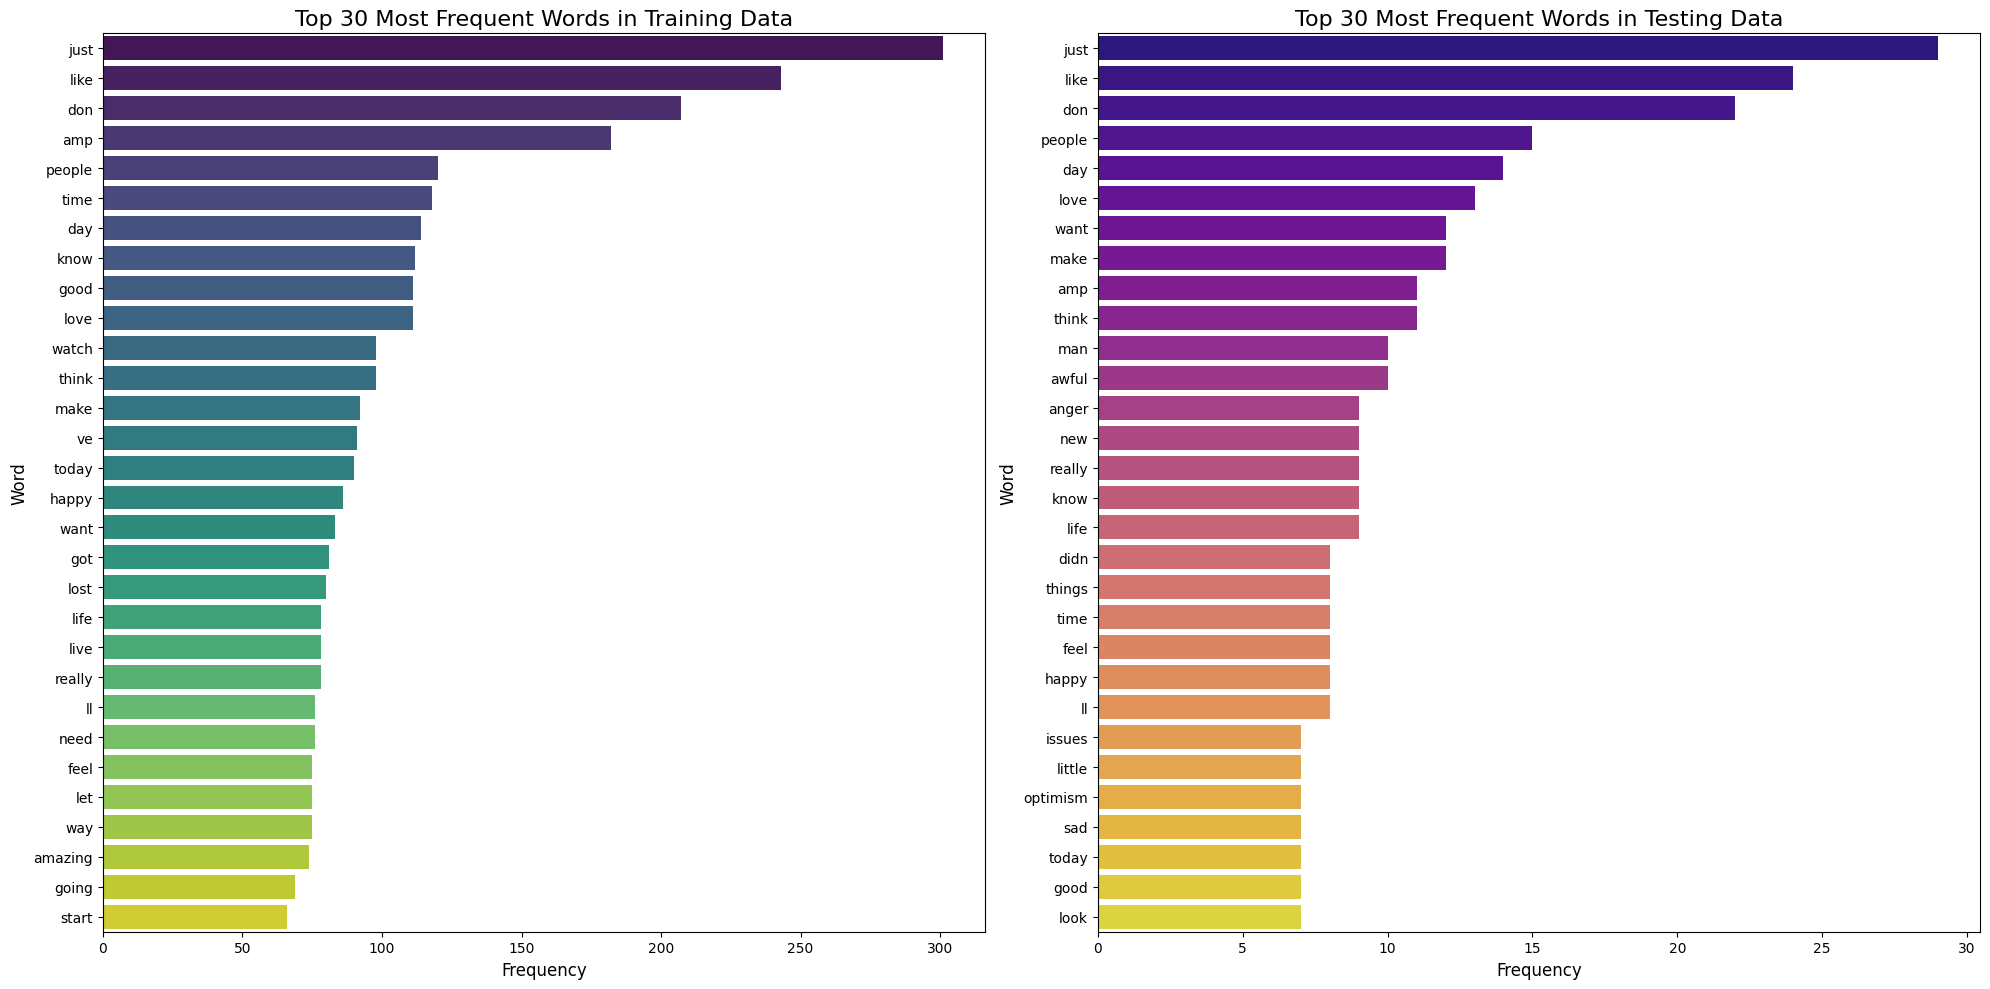

In [8]:
# Answer here
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_words(corpus, n=30):

    vec = CountVectorizer(stop_words='english')
    
    bag_of_words = vec.fit_transform(corpus)

    term_frequencies = np.asarray(bag_of_words.sum(axis=0))[0]

    vocabulary = vec.get_feature_names_out()

    word_freq_df = pd.DataFrame({
    'word': vocabulary,
    'frequency': term_frequencies
    }).sort_values('frequency', ascending=False)
    
    return word_freq_df[:n]


train_30wf_df= get_top_n_words(train_df['text'])

test_30wf_df= get_top_n_words(test_df['text'])


fig, axes = plt.subplots(1, 2, figsize=(20, 10))

sns.barplot(x='frequency', y='word', data=train_30wf_df, ax=axes[0], palette='viridis')
axes[0].set_title('Top 30 Most Frequent Words in Training Data', fontsize=16)
axes[0].set_xlabel('Frequency', fontsize=12)
axes[0].set_ylabel('Word', fontsize=12)

sns.barplot(x='frequency', y='word', data=test_30wf_df, ax=axes[1], palette='plasma')
axes[1].set_title('Top 30 Most Frequent Words in Testing Data', fontsize=16)
axes[1].set_xlabel('Frequency', fontsize=12)
axes[1].set_ylabel('Word', fontsize=12)

plt.tight_layout()
plt.show()

---
### <a id='toc1_5_2_'></a>[**1.2 Save data**](#toc0_)

We will save our data in Pickle format. The pickle module implements binary protocols for serializing and de-serializing a Python object structure.   
  
Some advantages for using pickle structure:  
* Because it stores the attribute type, it's more convenient for cross-platform use.  
* When your data is huge, it could use less space to store also consume less loading time.   

In [9]:
import os
os.makedirs("./data", exist_ok=True)
# save to pickle file
train_df.to_pickle("./data/train_df.pkl") 
test_df.to_pickle("./data/test_df.pkl")

In [10]:
import pandas as pd

# load a pickle file
train_df = pd.read_pickle("./data/train_df.pkl")
test_df = pd.read_pickle("./data/test_df.pkl")

For more information: https://reurl.cc/0Dzqx

---
### <a id='toc1_5_3_'></a>[**1.3 Exploratory data analysis (EDA)**](#toc0_)

Again, before getting our hands dirty, we need to explore a little bit and understand the data we're dealing with.

In [11]:
# group to find distribution
train_df.groupby(['emotion']).count()['text']

emotion
anger       857
fear       1147
joy         823
sadness     786
Name: text, dtype: int64

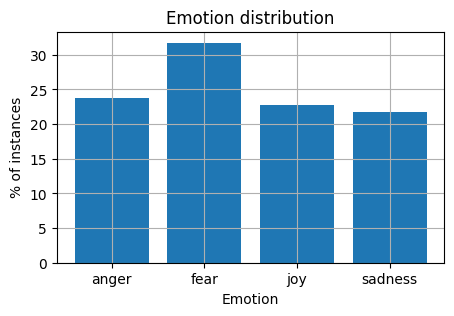

In [12]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
labels = train_df['emotion'].unique()
post_total = len(train_df)
df1 = train_df.groupby(['emotion']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(5,3))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

---

## <a id='toc1_6_'></a>[**2. Feature engineering**](#toc0_)
### <a id='toc1_6_1_'></a>[Using Bag of Words](#toc0_)
Using scikit-learn ```CountVectorizer``` perform word frequency and use these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

In [14]:
# build analyzers (bag-of-words)
BOW_vectorizer = CountVectorizer() 

In [15]:
# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
BOW_vectorizer.fit(train_df['text'])

# 2. Transform documents to document-term matrix.
train_data_BOW_features = BOW_vectorizer.transform(train_df['text'])
test_data_BOW_features = BOW_vectorizer.transform(test_df['text'])

In [16]:
# check the result
train_data_BOW_features

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 51467 stored elements and shape (3613, 10115)>

In [17]:
type(train_data_BOW_features)

scipy.sparse._csr.csr_matrix

In [18]:
# add .toarray() to show
train_data_BOW_features.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [19]:
# check the dimension
train_data_BOW_features.shape

(3613, 10115)

In [20]:
# observe some feature names
feature_names = BOW_vectorizer.get_feature_names_out()
feature_names[100:110]

array(['2k17', '2much', '2nd', '30', '300', '301', '30am', '30pm', '30s',
       '31'], dtype=object)

The embedding is done. We can technically feed this into our model. However, depending on the embedding technique you use and your model, your accuracy might not be as high, because:

* curse of dimensionality  (we have 10,115 dimension now)
* some important features are ignored (for example, some models using emoticons yeld better performance than counterparts)

In [21]:
"😂" in feature_names

False

Let's try using another tokenizer below.

In [22]:
import nltk

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

#根據text建立稀疏矩陣
train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(3613, 500)

In [23]:
train_data_BOW_features_500.toarray()

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 2, 0, ..., 0, 0, 0],
       [2, 3, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

In [24]:
# observe some feature names
feature_names_500 = BOW_500.get_feature_names_out()
feature_names_500[100:110]

array(['change', 'cheer', 'cheerful', 'cheering', 'cheery', 'come',
       'comes', 'could', 'country', 'cry'], dtype=object)

In [25]:
"😂" in feature_names_500

True

---
##### <a id='toc1_6_1_1_1_'></a>[**>>> Exercise 2 (Take home):**](#toc0_)
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

TF-IDF(term-frequency inverse document frequency) = term-vector matrix

In [26]:
# Answer here
from sklearn.feature_extraction.text import TfidfTransformer

BOW_1000 = CountVectorizer(max_features=1000, tokenizer=nltk.word_tokenize, stop_words='english') 

BOW_1000.fit(train_df['text'])

train_data_BOW_features_1000 = BOW_1000.transform(train_df['text'])

tfidf_transformer = TfidfTransformer()

train_data_TFIDF_features = tfidf_transformer.fit_transform(train_data_BOW_features_1000)

feature_names_1000 = BOW_1000.get_feature_names_out()
feature_names_1000[100:110]

array(['balls', 'based', 'bb18', 'bc', 'bday', 'beat', 'beautiful', 'bed',
       'behavior', 'believe'], dtype=object)

---
## <a id='toc1_7_'></a>[**3. Model**](#toc0_)
### <a id='toc1_7_1_'></a>[**3.1 Decision Trees**](#toc0_)
Using scikit-learn ```DecisionTreeClassifier``` performs word frequency and uses these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [27]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
#X是特徵(文本)，Y是標籤(情緒)
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [28]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=1)

## training!學習特徵和標籤的關聯性
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['anger', 'fear', 'anger', 'fear', 'fear', 'joy', 'joy', 'sadness',
       'anger', 'fear'], dtype=object)

---
## <a id='toc1_8_'></a>[**4. Results Evaluation**](#toc0_)

Now we will check the results of our model's performance

In [29]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))


training accuracy: 0.99
testing accuracy: 0.66


In [30]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.62      0.71      0.67        84
        fear       0.67      0.63      0.65       110
         joy       0.74      0.67      0.70        79
     sadness       0.62      0.64      0.63        74

    accuracy                           0.66       347
   macro avg       0.66      0.66      0.66       347
weighted avg       0.66      0.66      0.66       347



Precision:在模型「預測為正類」的樣本中，有多少是真正的正類。錯抓負例

Recall:在所有「實際正類」的樣本中，有多少被模型成功找出來。錯抓正例

In [31]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

#(true)\(predict)  anger fear joy sadness
#    anger     
#    fear       
#    joy       
#    sadness 

[[60 11  7  6]
 [20 69  7 14]
 [ 6 11 53  9]
 [10 12  5 47]]


In [32]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'Predicted label',
           ylabel = 'True label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

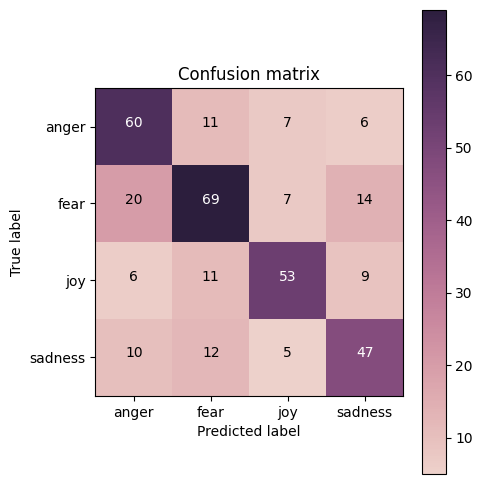

In [33]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
##### <a id='toc1_8_1_1_1_'></a>[**>>> Exercise 3 (Take home):**](#toc0_)
Can you interpret the results above? What do they mean?

In [34]:
# Answer here
'''
1. The model is overfitting, testing accuracy is only 0.66.
2. The F1-score of 'sadness' is the lowest, which means it's defficult to be learned and predicted by model.
3. The F1-score of 'joy' is highest, it's easy to learn the feature with this emotion by model.
4. In cm, it shows that 'fear' is mislead by anger and sadness. 
'''

"\n1. The model is overfitting, testing accuracy is only 0.66.\n2. The F1-score of 'sadness' is the lowest, which means it's defficult to be learned and predicted by model.\n3. The F1-score of 'joy' is highest, it's easy to learn the feature with this emotion by model.\n4. In cm, it shows that 'fear' is mislead by anger and sadness. \n"

---
##### <a id='toc1_8_1_1_2_'></a>[**>>> Exercise 4 (Take home):**](#toc0_)
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [35]:
# Answer here
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

NB_model = MultinomialNB()

NB_model.fit(X_train, y_train)

y_train_nb_pred = NB_model.predict(X_train)
y_test_nb_pred = NB_model.predict(X_test)

acc_train_nb = accuracy_score(y_true=y_train, y_pred=y_train_nb_pred)
acc_test_nb = accuracy_score(y_true=y_test, y_pred=y_test_nb_pred)

print('training accuracy: {}'.format(round(acc_train_nb, 2)))
print('testing accuracy: {}'.format(round(acc_test_nb, 2)))

print(classification_report(y_true=y_test, y_pred=y_test_nb_pred))


training accuracy: 0.79
testing accuracy: 0.71
              precision    recall  f1-score   support

       anger       0.65      0.67      0.66        84
        fear       0.74      0.81      0.77       110
         joy       0.77      0.70      0.73        79
     sadness       0.66      0.62      0.64        74

    accuracy                           0.71       347
   macro avg       0.71      0.70      0.70       347
weighted avg       0.71      0.71      0.71       347



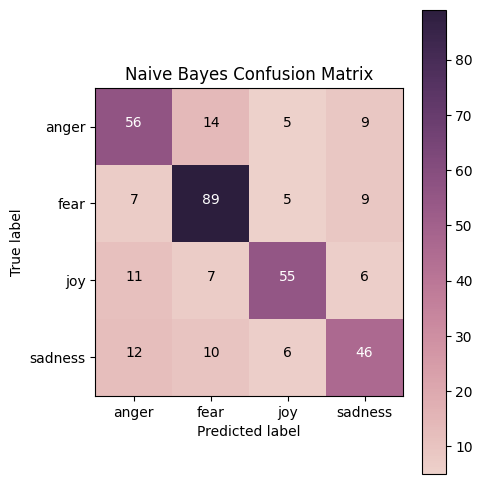

In [36]:
cm_nb = confusion_matrix(y_true=y_test, y_pred=y_test_nb_pred)
plot_confusion_matrix(cm_nb, classes=my_tags, title='Naive Bayes Confusion Matrix')

---
##### <a id='toc1_8_1_1_3_'></a>[**>>> Exercise 5 (Take home):**](#toc0_)

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

In [37]:
# Answer here
'''
Comparison:
1. NB model gets better F1-score, also it doesn't have overfitting problem like DT model.
2. NB model is good at classifying 'fear', can have average score in each emotion. Only sometimes it'll be confused by 'anger' and 'sadness'.

Reason:
1. For DT model to reach 99% accuracy, it may have too many nodes which causing noise when learning.
2. NB model initially assumes that all the features are independent in the dataset, make it simple to classify.
3. Generally, NB model is better than DT model in text dataset.
'''

"\nComparison:\n1. NB model gets better F1-score, also it doesn't have overfitting problem like DT model.\n2. NB model is good at classifying 'fear', can have average score in each emotion. Only sometimes it'll be confused by 'anger' and 'sadness'.\n\nReason:\n1. For DT model to reach 99% accuracy, it may have too many nodes which causing noise when learning.\n2. NB model initially assumes that all the features are independent in the dataset, make it simple to classify.\n3. Generally, NB model is better than DT model in text dataset.\n"

---

## <a id='toc1_9_'></a>[**5. Other things you can try**](#toc0_)

Thus, there are several things you can try that will affect your results. In order to yield better results, you can experiment by: 
- Trying different features (Feature engineering)e.g Word2Vec, PCA, LDA, FastText, Clustering
- Trying different models
- Analyzing your results and interpret them to improve your feature engineering/model building process
- Iterate through the steps above until finding a satisfying result

Remember that you should also consider the task at hand and the model you'll feed the data to. 

---
## <a id='toc1_10_'></a>[**6. Deep Learning**](#toc0_)

We use [Keras](https://keras.io/) to be our deep learning framework, and follow the [Model (functional API)](https://keras.io/models/model/) to build a Deep Neural Network (DNN) model. Keras runs with Tensorflow in the backend. It's a nice abstraction to start working with NN models. 

Because Deep Learning is a 1-semester course, we can't talk about each detail about it in the lab session. Here, we only provide a simple template about how to build & run a DL model successfully. You can follow this template to design your model.

We will begin by building a fully connected network, which looks like this:

![pic1.png](https://github.com/difersalest/DM2025-Lab2-Exercise/blob/main/pics/pic1.png?raw=True)

(source: https://github.com/drewnoff/spark-notebook-ml-labs/tree/master/labs/DLFramework)


---
### <a id='toc1_10_1_'></a>[**6.1 Prepare data (X, y)**](#toc0_)

In [38]:
import keras

# standardize name (X, y) 
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit 
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [39]:
import keras

In [40]:
BOW_500.transform(test_df['text'])

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 4103 stored elements and shape (347, 500)>

---
### <a id='toc1_10_2_'></a>[**6.2 Deal with categorical label (y)**](#toc0_)

Rather than put your label `train_df['emotion']` directly into a model, we have to process these categorical (or say nominal) label by ourselves. 

Here, we use the basic method [one-hot encoding](https://en.wikipedia.org/wiki/One-hot) to transform our categorical  labels to numerical ones.


In [41]:
# deal with label (string -> one-hot)
from sklearn.preprocessing import LabelEncoder
#LabelEncoder():學習所有的文字標籤（'anger', 'fear', 'joy', 'sadness'），為每一個標籤分配一個唯一的整數
label_encoder = LabelEncoder()
label_encoder.fit(y_train)

print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)#轉成One-Hot向量

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 415       anger
2776        joy
3315    sadness
167       anger
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


In [42]:
y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)




## After convert
y_train[0:4]:
 [[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


---
### <a id='toc1_10_3_'></a>[**6.3 Build model**](#toc0_)

In [43]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


![pic2.png](https://github.com/difersalest/DM2025-Lab2-Exercise/blob/main/pics/pic2.png?raw=True)

In [44]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500 (模型輸入長度)
X = model_input

# 1st hidden layer  ReLU:修正函數
X_W1 = Dense(units=64)(X)  # 64 (神經元)
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64 (神經元)
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4 (輸出神經元)因為有四個標籤
H3 = Softmax()(H2_W3)#轉換數值成總合為1的機率分佈

model_output = H3

# create model 藉由建立好的輸入輸出
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam', #優化器:根據「損失」來決定如何調整模型中的權重
              loss='categorical_crossentropy',
              metrics=['accuracy'])#叫模型回報正確率

# show model construction
model.summary()

I0000 00:00:1761901264.614684      18 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1761901264.615509      18 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        32,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax (Softmax)               │ (None, 4)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,484 (142.52 KB)

 Trainable params: 36,484 (142.52 KB)

 Non-trainable params: 0 (0.00 B)

---
### <a id='toc1_10_4_'></a>[**6.4 Train**](#toc0_)

In [45]:
from keras.callbacks import CSVLogger
import os
os.makedirs("./logs", exist_ok=True)
csv_logger = CSVLogger('./logs/training_log.csv')#儲存每個epoch的訓練結果

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/25


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 500))
  warnings.warn(msg)
I0000 00:00:1761901267.681864      70 service.cc:148] XLA service 0x790b70006050 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1761901267.682574      70 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1761901267.682592      70 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1761901267.896994      70 cuda_dnn.cc:529] Loaded cuDNN version 90300


  1/113 ━━━━━━━━━━━━━━━━━━━━ 4:34 2s/step - accuracy: 0.2812 - loss: 1.3900

I0000 00:00:1761901268.743964      70 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


113/113 ━━━━━━━━━━━━━━━━━━━━ 37s 310ms/step - accuracy: 0.3216 - loss: 1.3612 - val_accuracy: 0.3804 - val_loss: 1.3056
Epoch 2/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 13s 116ms/step - accuracy: 0.5747 - loss: 1.1238 - val_accuracy: 0.6657 - val_loss: 0.9252
Epoch 3/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 8s 72ms/step - accuracy: 0.7873 - loss: 0.6256 - val_accuracy: 0.6974 - val_loss: 0.7661
Epoch 4/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - accuracy: 0.8478 - loss: 0.4169 - val_accuracy: 0.7089 - val_loss: 0.7753
Epoch 5/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.8964 - loss: 0.3072 - val_accuracy: 0.6974 - val_loss: 0.8058
Epoch 6/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.9188 - loss: 0.2526 - val_accuracy: 0.7032 - val_loss: 0.8505
Epoch 7/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.9364 - loss: 0.2082 - val_accuracy: 0.6974 - val_loss: 0.9164
Epoch 8/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9469 - loss: 0.1726 - val_accuracy: 0

---
### <a id='toc1_10_5_'></a>[**6.5 Predict on testing data**](#toc0_)

In [46]:
## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(128, 500))
  warnings.warn(msg)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 236ms/step


array([[9.84474659e-01, 9.89616019e-05, 5.64842173e-10, 1.54264439e-02],
       [3.37625027e-01, 1.18608885e-01, 3.29398786e-10, 5.43766081e-01],
       [2.13725306e-02, 5.13423793e-03, 9.67614233e-01, 5.87901333e-03],
       [4.33849484e-01, 7.17347546e-04, 2.91733215e-07, 5.65432906e-01],
       [5.86930446e-06, 9.99984741e-01, 5.44159138e-06, 3.93462142e-06]],
      dtype=float32)

In [47]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['anger', 'sadness', 'joy', 'sadness', 'fear'], dtype=object)

In [48]:
from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

testing accuracy: 0.67


In [49]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("./logs/training_log.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.364794,1.334377,0.380403,1.305571
1,1,0.622474,1.018612,0.665706,0.925178
2,2,0.785774,0.608958,0.697406,0.766098
3,3,0.847495,0.417061,0.708934,0.775325
4,4,0.885137,0.327314,0.697406,0.805765
5,5,0.907833,0.266634,0.703170,0.850543
6,6,0.922779,0.221753,0.697406,0.916371
7,7,0.939662,0.185960,0.668588,0.979827
8,8,0.949073,0.159006,0.697406,1.044679
9,9,0.957099,0.137798,0.691643,1.073776


---
##### <a id='toc1_10_5_1_1_'></a>[**>>> Exercise 6 (Take home):**](#toc0_)

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below.(Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?

![pic3.png](https://github.com/difersalest/DM2025-Lab2-Exercise/blob/main/pics/pic3.png?raw=True)  ![pic4.png](https://github.com/difersalest/DM2025-Lab2-Exercise/blob/main/pics/pic4.png?raw=True)


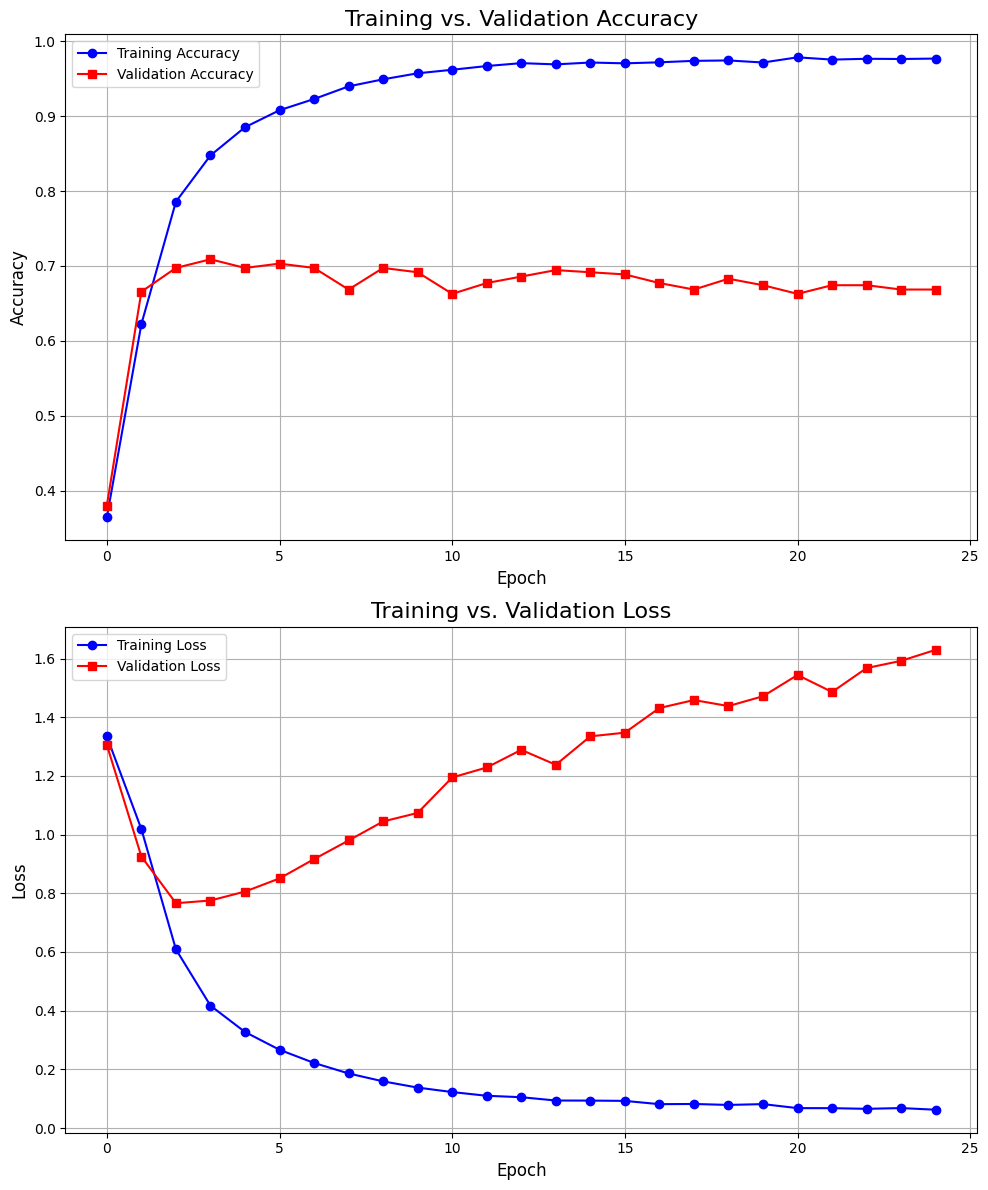

In [50]:
# Answer here
'''
Overfitting problem:
In accuracy plot, two lines increase at the same time and the validation stop growing after some point.
The validation can't follow as good as the trainning one.In loss plot the divergence also indecate overfitting.

Underfitting usually happen in extreme simple model that can't learn well with trainning set and keep making mistack.
'''
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# Training Accuracy
ax1.plot(training_log['epoch'], training_log['accuracy'], label='Training Accuracy', color='blue', marker='o')

# Validation Accuracy
ax1.plot(training_log['epoch'], training_log['val_accuracy'], label='Validation Accuracy', color='red', marker='s')

ax1.set_title('Training vs. Validation Accuracy', fontsize=16)
ax1.set_xlabel('Epoch', fontsize=12)
ax1.set_ylabel('Accuracy', fontsize=12)
ax1.legend()
ax1.grid(True)

# Training Loss
ax2.plot(training_log['epoch'], training_log['loss'], label='Training Loss', color='blue', marker='o')

# Validation Loss
ax2.plot(training_log['epoch'], training_log['val_loss'], label='Validation Loss', color='red', marker='s')

ax2.set_title('Training vs. Validation Loss', fontsize=16)
ax2.set_xlabel('Epoch', fontsize=12)
ax2.set_ylabel('Loss', fontsize=12)
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

---

### <a id='toc1_10_6_'></a>[Note](#toc0_)

If you don't have a GPU (level is higher than GTX 1060) or you are not good at setting lots of things about computer, we recommend you to use the [kaggle kernel](https://www.kaggle.com/kernels) to do deep learning model training. They have already installed all the librarys and provided free GPU for you to use.

Note however that you will only be able to run a kernel for 6 hours. After 6 hours of inactivity, your Kaggle kernel will shut down (meaning if your model takes more than 6 hours to train, you can't train it at once).


### <a id='toc1_10_7_'></a>[More Information for your reference](#toc0_)

* Keras document: https://keras.io/
* Keras GitHub example: https://github.com/keras-team/keras/tree/master/examples
* CS229: Machine Learning: http://cs229.stanford.edu/syllabus.html
* Deep Learning cheatsheet: https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-deep-learning
* If you want to try TensorFlow or PyTorch: https://pytorch.org/tutorials/
https://www.tensorflow.org/tutorials/quickstart/beginner

---
## <a id='toc1_11_'></a>[**7. Word2Vector**](#toc0_)

We will introduce how to use `gensim` to train your word2vec model and how to load a pre-trained model.

https://radimrehurek.com/gensim/index.html

"Word to Vector"是一種強大的「詞嵌入」(Word Embedding) 技術，它的核心概念是：將每一個「單詞」轉換成一個「多維向量」（一串數字）。「你能夠透過一個詞的鄰居來認識這個詞」
1. Skip-gram：給定一個中心詞（例如 "happy"），模型試圖預測它周圍的上下文單詞（例如 "so"、"today"、"smile"）。

2. CBOW (Continuous Bag-of-Words)：給定上下文單詞（例如 "so"、"today"、"smile"），模型試圖預測中間的中心詞（"happy"）。

---
### <a id='toc1_11_1_'></a>[**7.1 Prepare training corpus**](#toc0_)

In [51]:
## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
415,10415,I think they may be #offended,"[I, think, they, may, be, #, offended]"
2776,30772,Harking back to 2012 - DT's challenge to @POTU...,"[Harking, back, to, 2012, -, DT, 's, challenge..."
3315,40488,Been working in Blanchardstown shopping centre...,"[Been, working, in, Blanchardstown, shopping, ..."
167,10167,@RealBD_ @ReyesAverie 47 unarmed blacks killed...,"[@, RealBD_, @, ReyesAverie, 47, unarmed, blac..."
1880,21023,@JogglingDroid @BrancoCarmine @Otto_English ye...,"[@, JogglingDroid, @, BrancoCarmine, @, Otto_E..."


In [52]:
## create the training corpus
training_corpus = train_df['text_tokenized'].values
training_corpus[:3]

array([list(['I', 'think', 'they', 'may', 'be', '#', 'offended']),
       list(['Harking', 'back', 'to', '2012', '-', 'DT', "'s", 'challenge', 'to', '@', 'POTUS', '...', 'I', 'will', 'give', '...', 'DT', 'a', 'hearty', 'thank', 'you', '...', 'if', 'he', 'will', 'release', 'his', 'tax', 'returns', '....']),
       list(['Been', 'working', 'in', 'Blanchardstown', 'shopping', 'centre', 'for', 'over', '2', 'years', 'now', 'and', 'I', 'only', 'figured', 'out', 'today', 'where', 'Marks', '&', 'amp', ';', 'Spencer', "'s", 'is', '#', 'lost'])],
      dtype=object)

---
### <a id='toc1_11_2_'></a>[**7.2 Training our model**](#toc0_)

You can try to train your own model. More details: https://radimrehurek.com/gensim/models/word2vec.html

In [53]:
from gensim.models import Word2Vec

## setting
vector_dim = 100
window_size = 5  #訓練時只參考前後@個詞 
min_count = 1   #設定最小詞頻
training_epochs = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus, 
                          vector_size=vector_dim, window=window_size, 
                          min_count=min_count, epochs=training_epochs)

![Imgur](https://i.imgur.com/Fca3MCs.png)

---
### <a id='toc1_11_3_'></a>[**7.3 Generating word vector (embeddings)**](#toc0_)

In [54]:
# get the corresponding vector of a word
word_vec = word2vec_model.wv['happy']
word_vec

array([ 0.34892923,  0.1278838 ,  0.12965131, -0.1931017 , -0.14770958,
       -1.3664584 ,  0.20845063,  1.446311  , -0.6906705 , -0.44906646,
       -0.61973256, -0.5079396 , -0.73872614,  0.45264807, -0.04635783,
       -0.25342807,  0.03394293, -0.6497012 ,  0.36398694, -1.5630041 ,
        0.58155507,  0.64707863,  0.6594169 ,  0.08472962,  0.14181045,
        0.16325407, -0.4735666 ,  0.70326823, -0.09382423,  0.19937348,
        0.31674704, -0.29064676,  0.72313297, -0.33103734, -0.3673134 ,
        0.21489926, -0.01521342, -0.22969927, -0.5016207 , -0.6738095 ,
       -0.01169651, -0.02192969, -0.32905623,  0.08023795,  0.7444417 ,
       -0.13012315, -0.93758625,  0.1781369 ,  0.11881623,  0.3557808 ,
        0.1906783 , -0.36797842, -0.4290826 , -0.09704966, -0.48464233,
       -0.38179493, -0.04880466, -0.15228924, -0.14443198,  0.12468112,
       -0.06375497, -0.17828766,  0.10898098,  0.28065014, -0.5507298 ,
        0.70543414,  0.5840786 ,  0.75722027, -1.3610408 ,  0.26

In [55]:
# Get the most similar words
word = 'happy'
topn = 10
word2vec_model.wv.most_similar(word, topn=topn)

[('birthday', 0.9206387996673584),
 ('free', 0.9145289063453674),
 ('keeping', 0.9138876795768738),
 ('bday', 0.9135630130767822),
 ('blessed', 0.9129591584205627),
 ('cats', 0.9007303714752197),
 ('home-owning', 0.9005635976791382),
 ("'you", 0.8959088921546936),
 ('mess', 0.8940575122833252),
 ('help', 0.8931035995483398)]

---
### <a id='toc1_11_4_'></a>[**7.4 Using a pre-trained w2v model**](#toc0_)

Instead of training your own model ,you can use a model that has already been trained. Here, we see 2 ways of doing that:


#### <a id='toc1_11_4_1_'></a>[(1) Download model by yourself](#toc0_)

source: [GoogleNews-vectors-negative300](https://code.google.com/archive/p/word2vec/)

more details: https://radimrehurek.com/gensim/models/keyedvectors.html

In [56]:
from gensim.models import KeyedVectors

## Note: this model is huge, this will take some time ...
model_path = "/kaggle/input/google-news-vectors/GoogleNews-vectors-negative300.bin"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

load ok


[('glad', 0.7408890724182129),
 ('pleased', 0.6632171273231506),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286198616028),
 ('thrilled', 0.6514049172401428),
 ('satisfied', 0.6437948942184448),
 ('proud', 0.636042058467865),
 ('delighted', 0.6272379159927368),
 ('disappointed', 0.6269949078559875),
 ('excited', 0.6247666478157043)]

#### <a id='toc1_11_4_2_'></a>[(2) Using gensim api](#toc0_)

Other pretrained models are available here: https://github.com/RaRe-Technologies/gensim-data

In [57]:
import gensim.downloader as api

## If you see `SSL: CERTIFICATE_VERIFY_FAILED` error, use this:
import ssl
import urllib.request
ssl._create_default_https_context = ssl._create_unverified_context

glove_twitter_25_model = api.load("glove-twitter-25") #Twitter 資料上訓練的
print('load ok')

glove_twitter_25_model.most_similar('happy', topn=10)

[==================================================] 100.0% 104.8/104.8MB downloaded
load ok


[('birthday', 0.9577817320823669),
 ('thank', 0.937666654586792),
 ('welcome', 0.9336148500442505),
 ('love', 0.9176183342933655),
 ('miss', 0.9164499640464783),
 ('hello', 0.9158352017402649),
 ('thanks', 0.9150084853172302),
 ('merry', 0.9053248763084412),
 ('bless', 0.9027323722839355),
 ('wish', 0.9013165235519409)]

---
### <a id='toc1_11_5_'></a>[**7.5 king + woman - man = ?**](#toc0_)

Let's run one of the most famous examples for Word2Vec and compute the similarity between these 3 words:

In [58]:
w2v_google_model.most_similar(positive=['king', 'woman'], negative=['man'])

[('queen', 0.7118192911148071),
 ('monarch', 0.6189674735069275),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.549946129322052),
 ('prince', 0.5377321243286133),
 ('kings', 0.5236843824386597),
 ('Queen_Consort', 0.5235944390296936),
 ('queens', 0.5181134343147278),
 ('sultan', 0.5098593235015869),
 ('monarchy', 0.5087411403656006)]

---
##### <a id='toc1_11_5_1_1_'></a>[**>>> Exercise 7 (Take home):**](#toc0_)

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


In [59]:
# Answer here
'''
1. We can compute a average of all word vectors in same the sentence, then input the average into the model.
2. Input the word vectors one by one like RNN model, take the advantage of time and a sequence of vectors.
'''

'\n1. We can compute a average of all word vectors in same the sentence, then input the average into the model.\n2. Input the word vectors one by one like RNN model, take the advantage of time and a sequence of vectors.\n'

---
## <a id='toc1_12_'></a>[**8. Clustering: k-means**](#toc0_)

Here we introduce how to use `sklearn` to do the basic **unsupervised learning** approach, k-means.    

more details: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html


#### <a id='toc1_12_1_1_'></a>[Basic concept](#toc0_)

![pic5.png](https://github.com/difersalest/DM2025-Lab2-Exercise/blob/main/pics/pic5.png?raw=True)

(img source: https://towardsdatascience.com/k-means-clustering-identifying-f-r-i-e-n-d-s-in-the-world-of-strangers-695537505d)

In [60]:
# clustering target
target_list = ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']
print('target words: ', target_list)

# convert to word vector
X = [word2vec_model.wv[word] for word in target_list]

target words:  ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']


In [61]:
from sklearn.cluster import KMeans

# we have to decide how many cluster (k) we want
k = 2

# k-means model
kmeans_model = KMeans(n_clusters=k)
kmeans_model.fit(X)

# cluster result
cluster_result = kmeans_model.labels_

# show
for i in range(len(target_list)):
    print('word: {} \t cluster: {}'.format(target_list[i], cluster_result[i]))

word: happy 	 cluster: 0
word: fear 	 cluster: 0
word: angry 	 cluster: 0
word: car 	 cluster: 1
word: teacher 	 cluster: 1
word: computer 	 cluster: 1


![pic6.png](https://github.com/difersalest/DM2025-Lab2-Exercise/blob/main/pics/pic6.png?raw=True)

In [62]:
#check cluster membership
word = 'student'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([1], dtype=int32)

In [63]:
#check cluster membership
word = 'sad'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([0], dtype=int32)

---
## <a id='toc1_13_'></a>[**9. High-dimension Visualization: t-SNE and UMAP**](#toc0_)

No matter if you use the Bag-of-words, TF-IDF, or Word2Vec, it's very hard to see the embedding result, because the dimension is larger than 3.  

In Lab 1, we already talked about PCA, t-SNE and UMAP. We can use PCA to reduce the dimension of our data, then visualize it. However, if you dig deeper into the result, you'd find it is insufficient.

Our aim will be to create a visualization similar to the one below with t-SNE:

![pic7.png](https://github.com/difersalest/DM2025-Lab2-Exercise/blob/main/pics/pic7.png?raw=True)

source: https://www.fabian-keller.de/research/high-dimensional-data-visualization 

And also like this for UMAP:

![pic9.png](https://github.com/difersalest/DM2025-Lab2-Exercise/blob/main/pics/pic9.png?raw=True)

source: https://umap-learn.readthedocs.io/en/latest/auto_examples/plot_mnist_example.html

t-SNE and UMAP reference:  
http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html 
https://umap-learn.readthedocs.io/en/latest/

---
### <a id='toc1_13_1_'></a>[**9.1 Prepare visualizing target**](#toc0_)

Let's prepare data lists like:
- happy words
- angry words
- data words
- mining words

In [64]:
word_list = ['happy', 'angry', 'data', 'mining']

topn = 5
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]        
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('data_words: ', data_words)
print('mining_words: ', mining_words)

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed']
data_words:  ['data', 'Data', 'datasets', 'dataset', 'databases', 'statistics']
mining_words:  ['mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'data', 'Data', 'datasets', 'dataset', 'databases', 'statistics', 'mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

color list:
['b', 'b', 'b', 'b', 'b', 'b', 'g', 'g', 'g', 'g', 'g', 'g', 'r', 'r', 'r', 'r', 'r', 'r', 'y', 'y', 'y', 'y', 'y', 'y']


---
### <a id='toc1_13_2_'></a>[**9.2 Plot using t-SNE and UMAP (2-dimension)**](#toc0_)

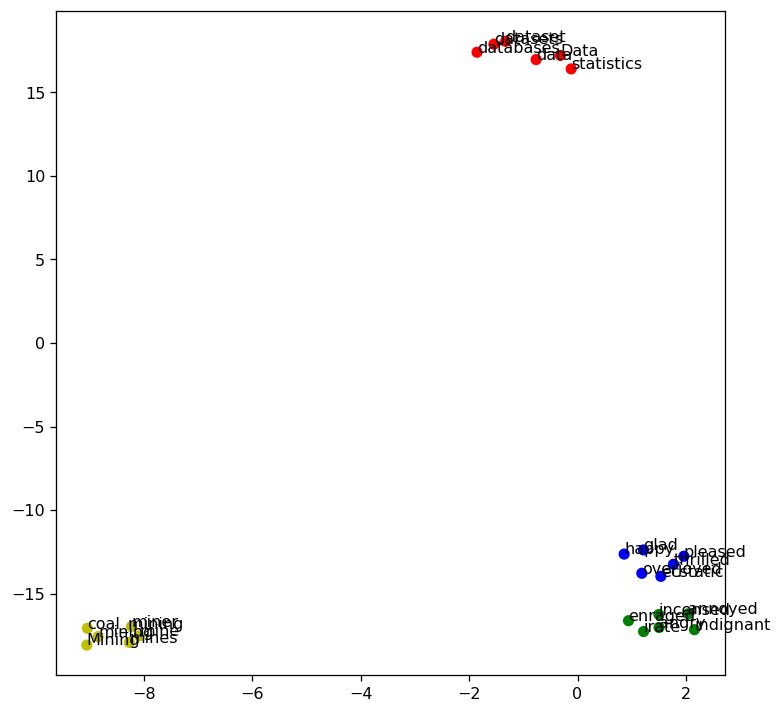

In [65]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

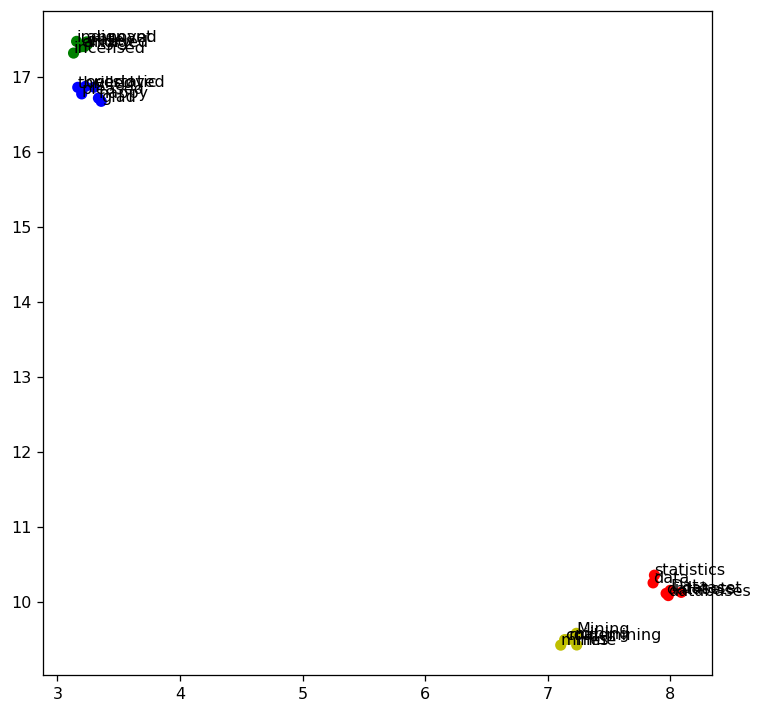

In [66]:
import matplotlib.pyplot as plt
import umap.umap_ as umap

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## UMAP model
umap_model = umap.UMAP(n_components=2, metric='cosine', random_state=28)

## training
X_umap = umap_model.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_umap[:target_size, 0], X_umap[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_umap[:target_size, 0], X_umap[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()


---
##### <a id='toc1_13_2_1_1_'></a>[**>>> Exercise 8 (Take home):**](#toc0_)

Generate a t-SNE and UMAP visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total). Compare the differences between both graphs.

Data prepared. Shape: (60, 300)


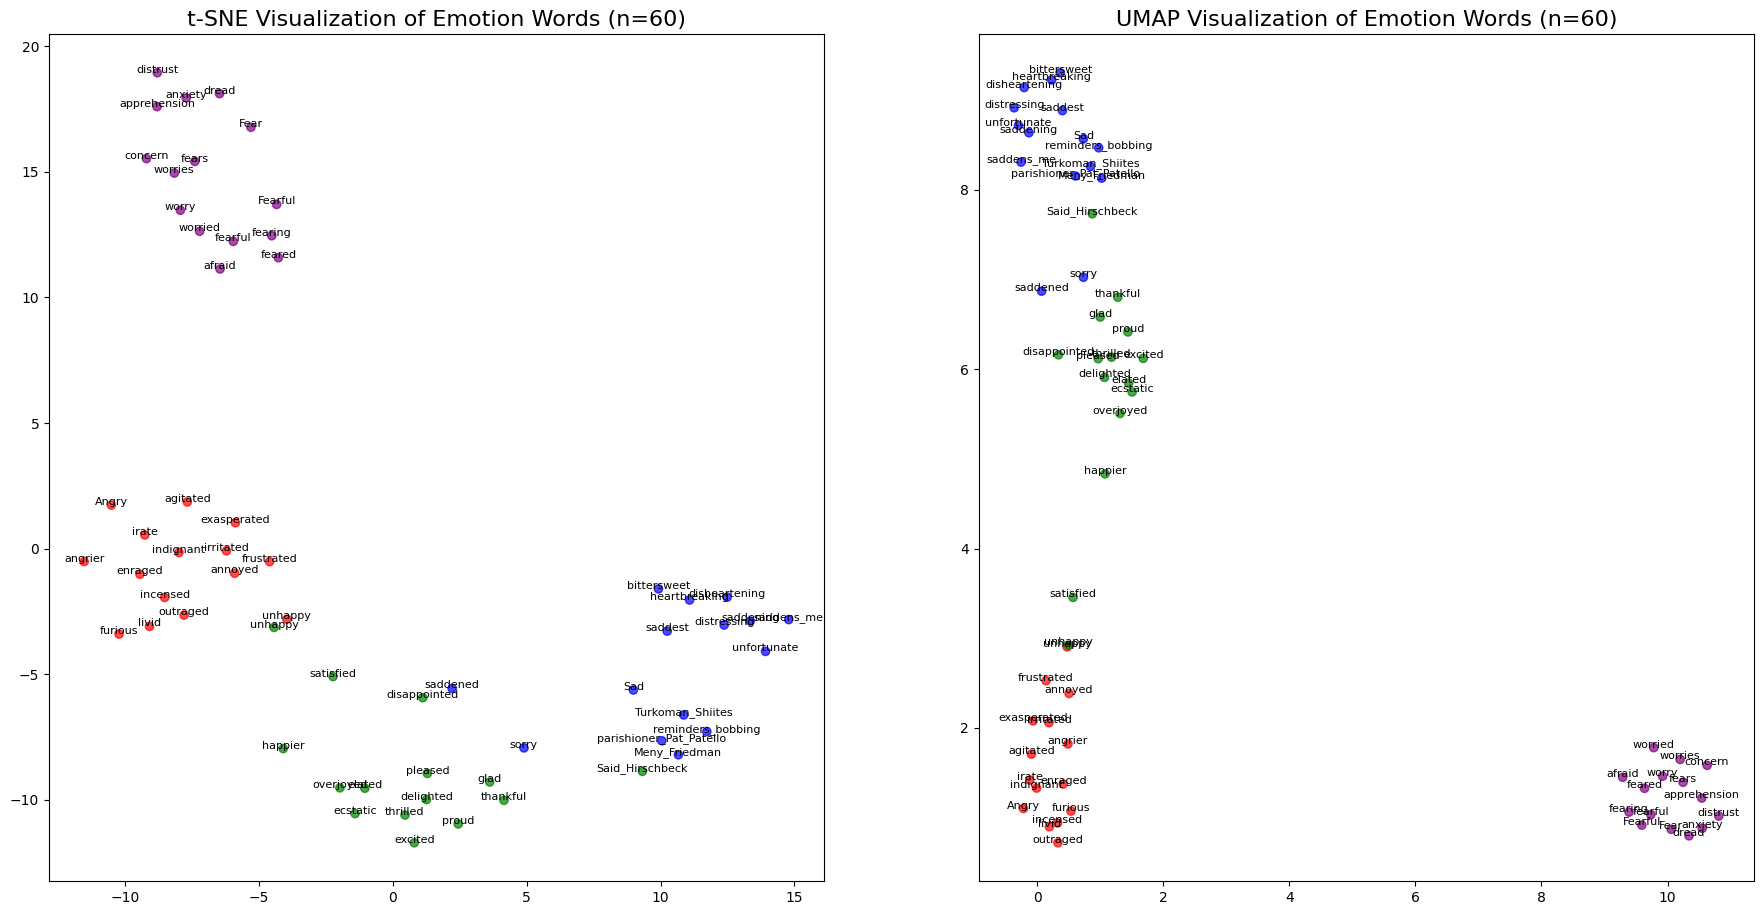

In [67]:
# Answer here
'''
In t-SNE plot, 'angry' and 'fear' are close, 'happy' and 'sad' are close. So the propertys of similer emotion labels will be close in plot.
The position of words in UMAP plot are meaningful and closer then t-SNE, better in textual analyze. 
'''
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import umap.umap_ as umap
import numpy as np

model = w2v_google_model

topn = 15
seed_words = ['angry', 'happy', 'sad', 'fear']
colors = ['red', 'green', 'blue', 'purple'] 

target_words = []
color_list = []
word_vectors = []

for i, word in enumerate(seed_words):
    related_words = [w for w, sim in model.most_similar(word, topn=topn)]
    for rel_word in related_words:
        target_words.append(rel_word)
        word_vectors.append(model[rel_word]) 
        color_list.append(colors[i]) 

X_train = np.array(word_vectors)
print(f"Data prepared. Shape: {X_train.shape}")

tsne = TSNE(n_components=2, metric='cosine', random_state=28, perplexity=10)
X_tsne = tsne.fit_transform(X_train)

umap_model = umap.UMAP(n_components=2, metric='cosine', random_state=28, n_neighbors=10)
X_umap = umap_model.fit_transform(X_train)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 11))

ax1.scatter(X_tsne[:, 0], X_tsne[:, 1], c=color_list, alpha=0.7)
ax1.set_title('t-SNE Visualization of Emotion Words (n=60)', fontsize=16)

for i, label in enumerate(target_words):
    ax1.annotate(label, 
                 xy=(X_tsne[i, 0], X_tsne[i, 1]),
                 textcoords='offset points',
                 xytext=(0, 0), 
                 ha='center',
                 fontsize=8) 

ax2.scatter(X_umap[:, 0], X_umap[:, 1], c=color_list, alpha=0.7)
ax2.set_title('UMAP Visualization of Emotion Words (n=60)', fontsize=16)

for i, label in enumerate(target_words):
    ax2.annotate(label, 
                 xy=(X_umap[i, 0], X_umap[i, 1]),
                 textcoords='offset points',
                 xytext=(0, 0),
                 ha='center',
                 fontsize=8)

plt.show()

---